In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split # To split the dataset into train and test datasets
from sklearn import metrics # To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel ('Election_Data.xlsx',sheet_name="Election_Dataset_Two Classes",index_col=0)

### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (6 Marks)

In [3]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


In [4]:
df.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1521,Conservative,67,5,3,2,4,11,3,male
1522,Conservative,73,2,2,4,4,8,2,male
1523,Labour,37,3,3,5,4,2,2,male
1524,Conservative,61,3,3,1,4,11,2,male
1525,Conservative,74,2,3,2,4,11,0,female


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [6]:
df.shape[1]

9

In [7]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [8]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
68,Labour,35,4,4,5,2,3,2,male
627,Labour,39,3,4,4,2,5,2,male
871,Labour,38,2,4,2,2,4,3,male
984,Conservative,74,4,3,2,4,8,2,female
1155,Conservative,53,3,4,2,2,6,0,female
1237,Labour,36,3,3,2,2,6,2,female
1245,Labour,29,4,4,4,2,2,2,female
1439,Labour,40,4,3,4,2,2,2,male


In [9]:
df.drop_duplicates(inplace=True) # Deleting the Duplicate records

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [11]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [12]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [13]:
df[cat].describe().T

,count,unique,top,freq
vote,1517,2,Labour,1057
gender,1517,2,female,808


In [14]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




In [15]:
df.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (8 Marks)

##### Univariate Analysis 

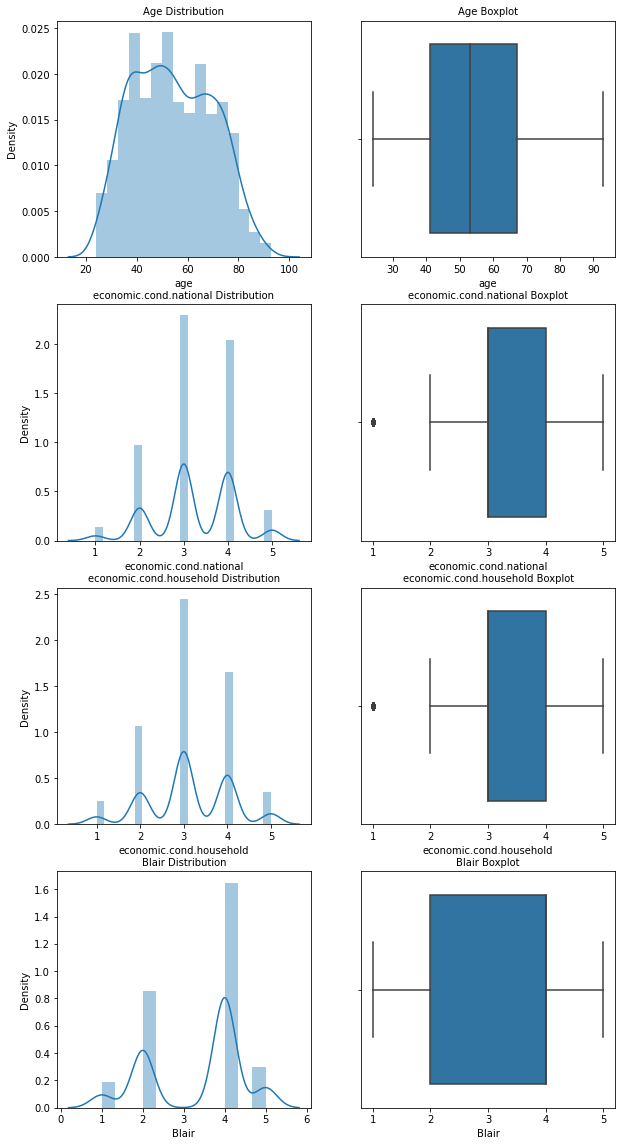

In [16]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("Age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("Age Boxplot",fontsize=10)

a = sns.distplot(df['economic.cond.national'] , ax=axes[1][0])
a.set_title("economic.cond.national Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(df['economic.cond.household'] , ax=axes[2][0])
a.set_title("economic.cond.household Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)


a = sns.distplot(df['Blair'] , ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)

plt.show()

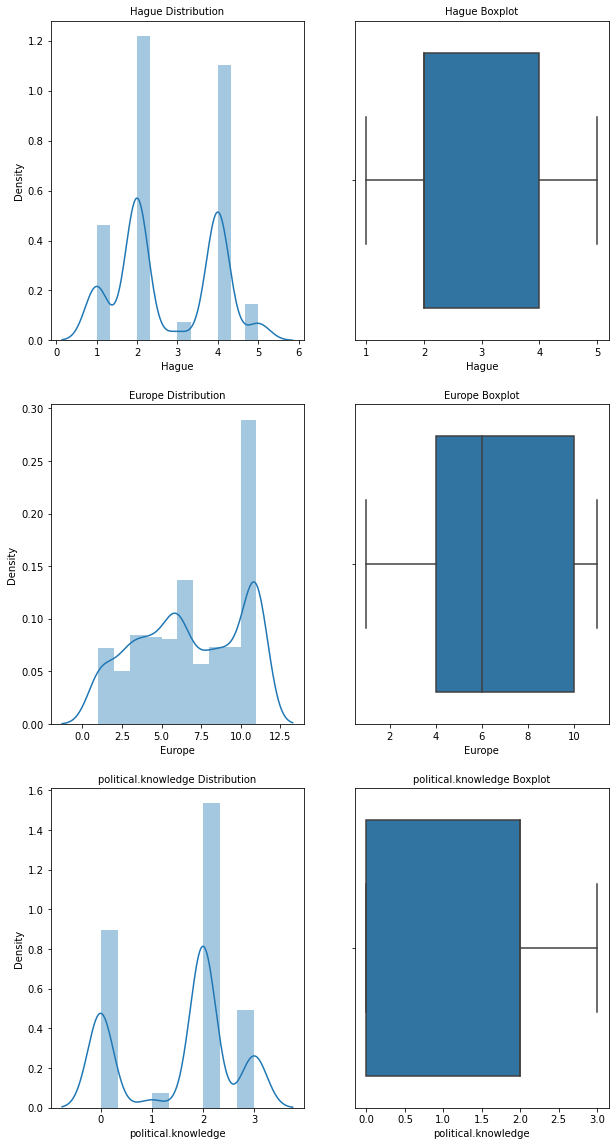

In [17]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=10)

a = sns.distplot(df['Europe'] , ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[1][1])
a.set_title("Europe Boxplot",fontsize=10)


a = sns.distplot(df['political.knowledge'] , ax=axes[2][0])
a.set_title("political.knowledge Distribution",fontsize=10)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[2][1])
a.set_title("political.knowledge Boxplot",fontsize=10)

plt.show()

Text(0.5, 1.0, 'Vote Distribution (Target variable)')

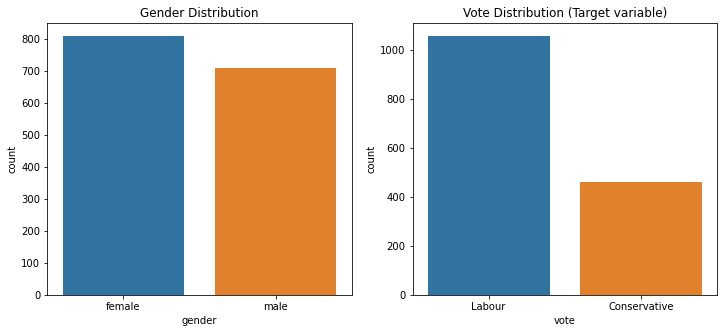

In [18]:
fig,axes= plt.subplots(nrows=1, ncols=2, figsize=(12,5))
a = sns.countplot (x = 'gender', data = df, ax = axes [0])
a.set_title('Gender Distribution',fontsize=12)
a = sns.countplot (x = 'vote', data = df, ax = axes [1])
a.set_title("Vote Distribution (Target variable)",fontsize=12)

Text(0.5, 1.0, '% of gender distribution')

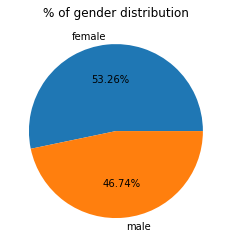

In [19]:
plt.pie(df['gender'].value_counts(), labels = df['gender'].value_counts().index, autopct = '%0.2f%%');
plt.title ('% of gender distribution')

Text(0.5, 1.0, '% of vote distribution')

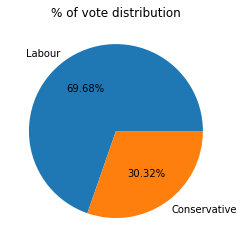

In [20]:
plt.pie(df['vote'].value_counts(), labels = df['vote'].value_counts().index, autopct = '%0.2f%%');
plt.title ('% of vote distribution')

Through this univariate analysis of our target variable of vote we can clearly see that there are approximately 70% of people who vote for labour and only 30% of them vote for conservative

##### Bivariate Analysis

In [21]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

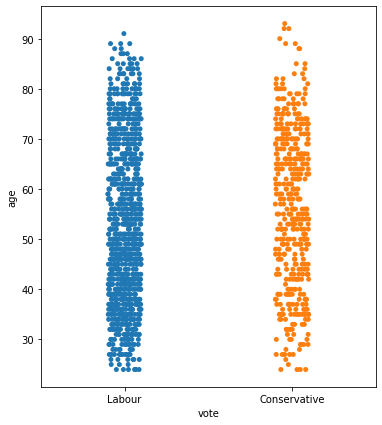

In [22]:
plt.figure(figsize=(6,7))
sns.stripplot(df["vote"], df['age'], jitter=True) 
plt.show()

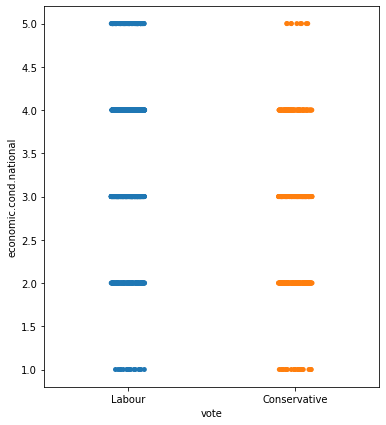

In [23]:
plt.figure(figsize=(6,7))
sns.stripplot(df["vote"], df['economic.cond.national'], jitter=True) 
plt.show()

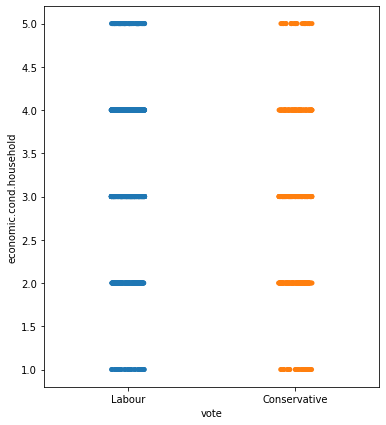

In [24]:
plt.figure(figsize=(6,7))
sns.stripplot(df["vote"], df['economic.cond.household'], jitter=True) 
plt.show()

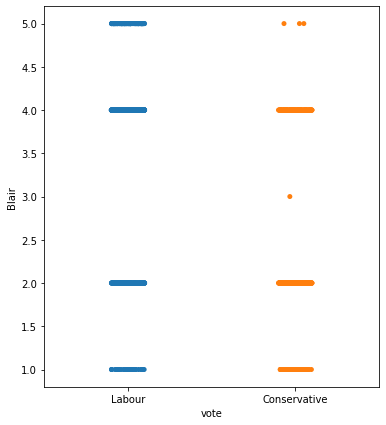

In [25]:
plt.figure(figsize=(6,7))
sns.stripplot(df["vote"], df['Blair'], jitter=True) 
plt.show()

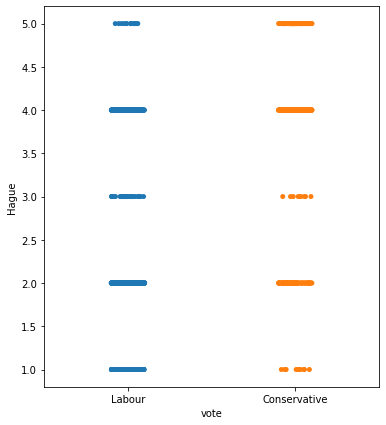

In [26]:
plt.figure(figsize=(6,7))
sns.stripplot(df["vote"], df['Hague'], jitter=True) 
plt.show()

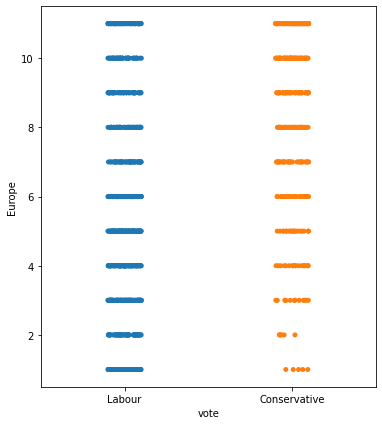

In [27]:
plt.figure(figsize=(6,7))
sns.stripplot(df["vote"], df['Europe'], jitter=True) 
plt.show()

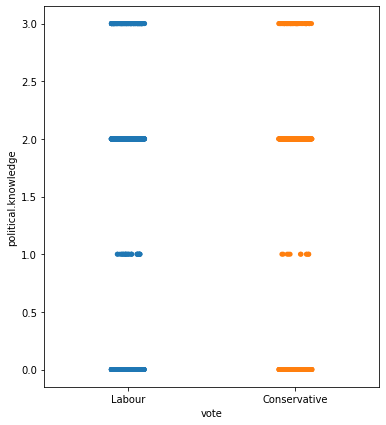

In [28]:
plt.figure(figsize=(6,7))
sns.stripplot(df["vote"], df['political.knowledge'], jitter=True) 
plt.show()

In [29]:
df_num = df[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']]

<Figure size 504x504 with 0 Axes>

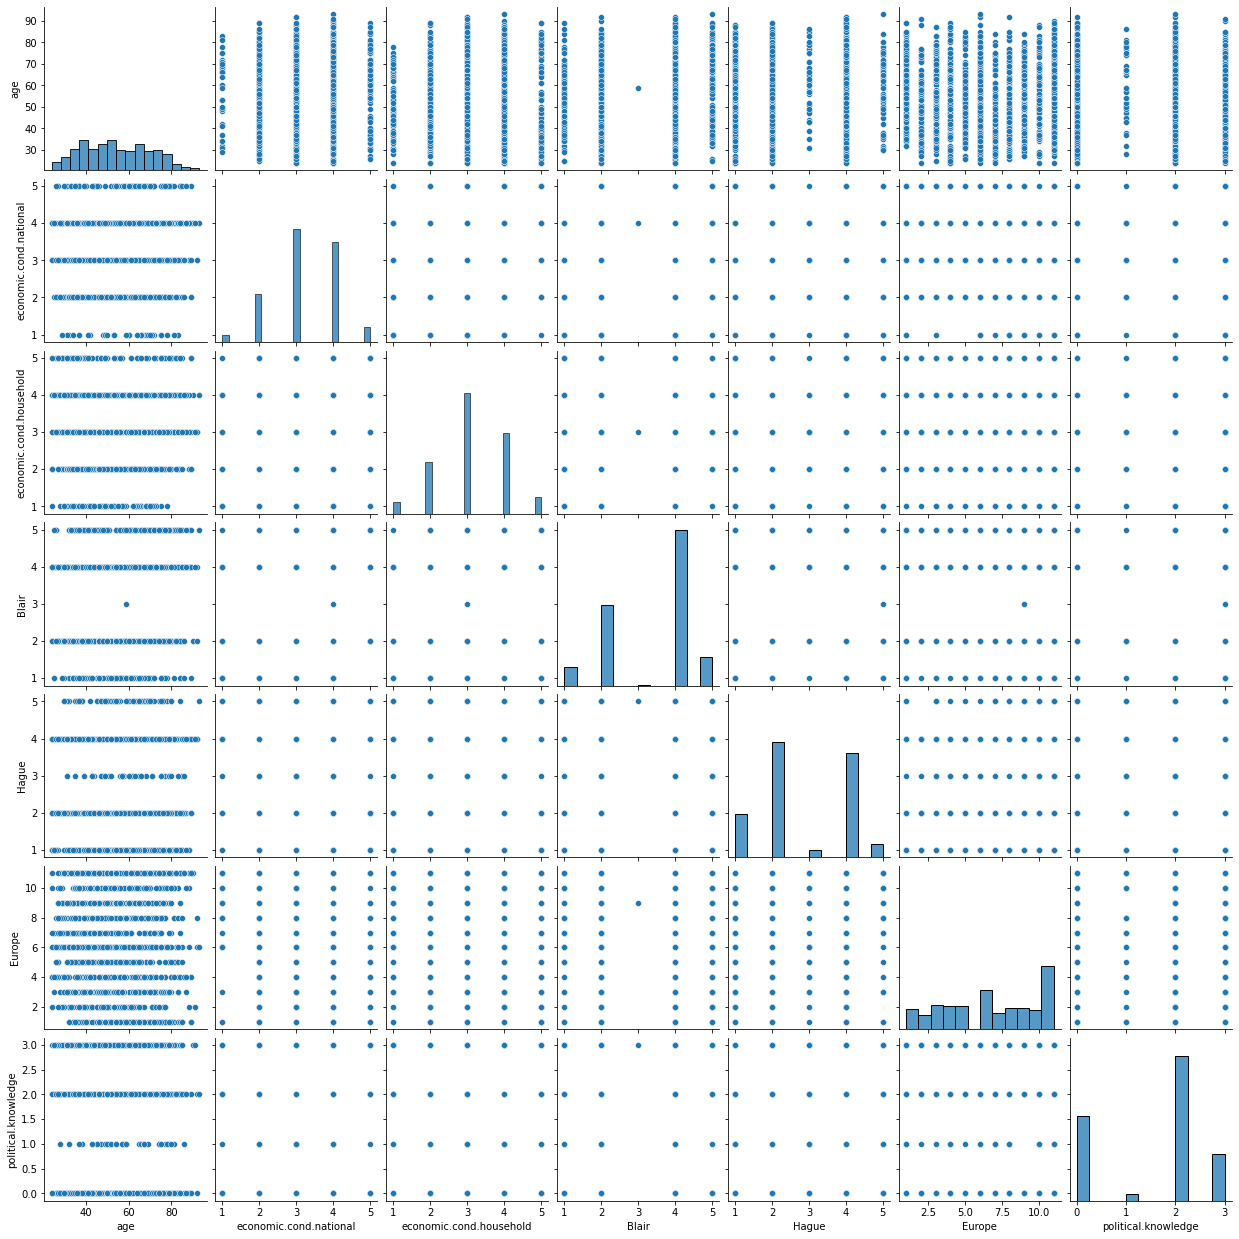

In [30]:
plt.figure (figsize = (7,7))
sns.pairplot(data = df_num)

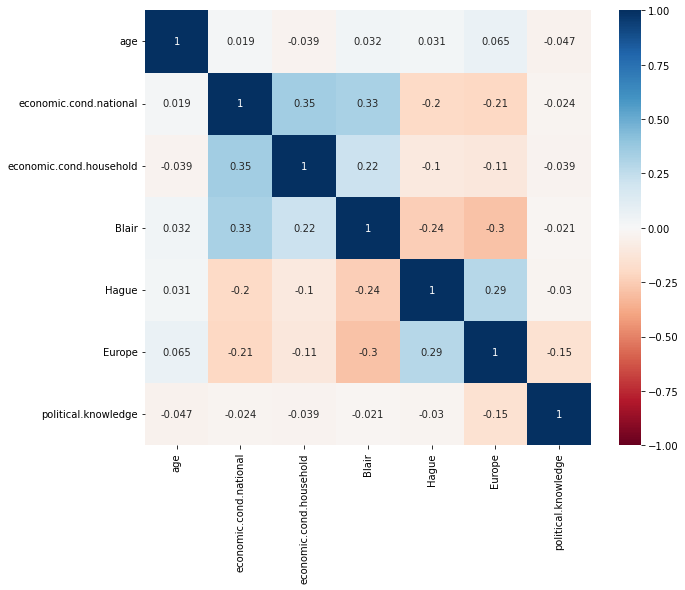

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,vmin=-1,cmap='RdBu')
plt.show()

Text(0.5, 1.0, 'Employees education level analysis')

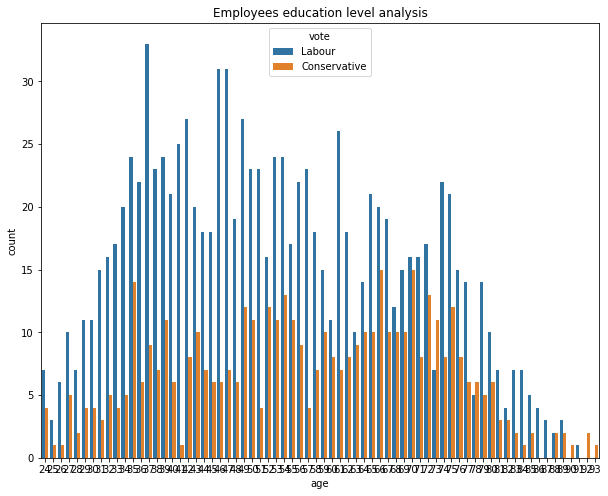

In [32]:
plt.figure(figsize=(10,8))
sns.countplot (x = 'age', data = df, hue = 'vote',)
plt.title('Employees education level analysis')

Text(0.5, 1.0, 'Assesment of Labour leader')

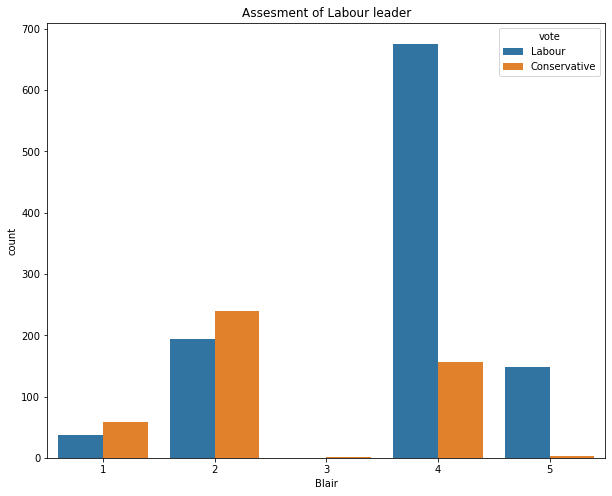

In [33]:
plt.figure(figsize=(10,8))
sns.countplot (x = 'Blair', data = df, hue = 'vote',)
plt.title('Assesment of Labour leader')

Text(0.5, 1.0, 'Assesment of conservative leader')

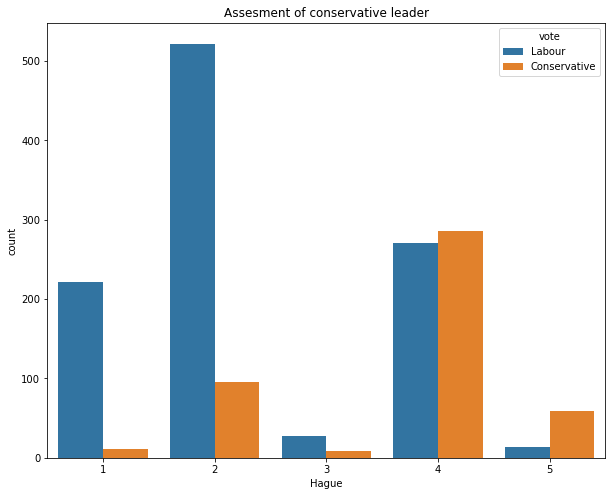

In [34]:
plt.figure(figsize=(10,8))
sns.countplot (x = 'Hague', data = df, hue = 'vote',)
plt.title('Assesment of conservative leader')

Text(0.5, 1.0, 'Assesment of political knowledge')

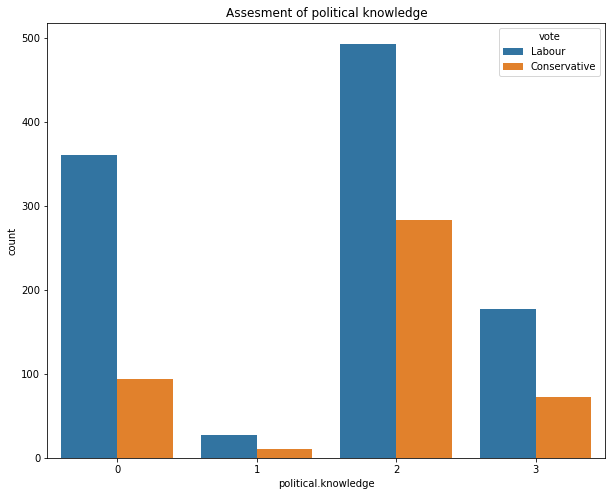

In [35]:
plt.figure(figsize=(10,8))
sns.countplot (x = 'political.knowledge', data = df, hue = 'vote',)
plt.title('Assesment of political knowledge')

Text(0.5, 1.0, 'Assessment of current household economic conditions')

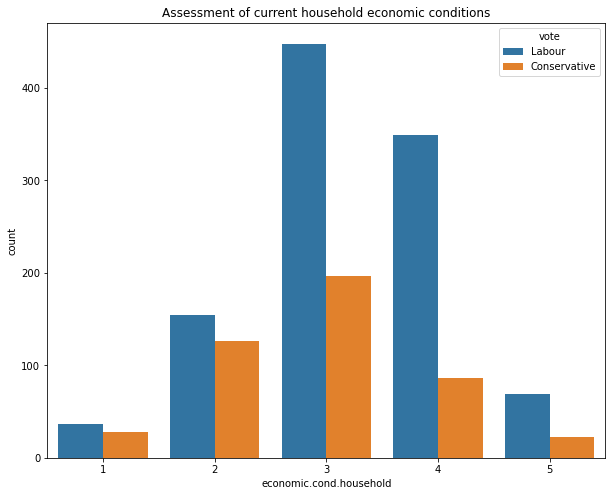

In [36]:
plt.figure(figsize=(10,8))
sns.countplot (x = 'economic.cond.household', data = df, hue = 'vote',)
plt.title('Assessment of current household economic conditions')

Text(0.5, 1.0, 'Assessment of current national economic conditions')

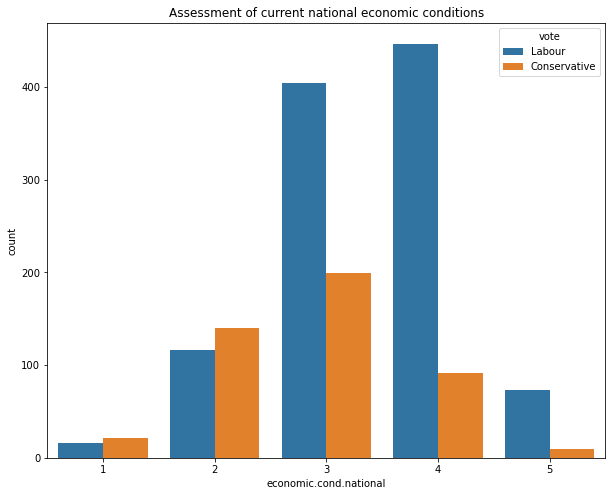

In [37]:
plt.figure(figsize=(10,8))
sns.countplot (x = 'economic.cond.national', data = df, hue = 'vote',)
plt.title('Assessment of current national economic conditions')

Summary and outcomes is at the project file

## 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [38]:
df =pd.get_dummies(df, columns=cat,drop_first=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1517 non-null   int64
 1   economic.cond.national   1517 non-null   int64
 2   economic.cond.household  1517 non-null   int64
 3   Blair                    1517 non-null   int64
 4   Hague                    1517 non-null   int64
 5   Europe                   1517 non-null   int64
 6   political.knowledge      1517 non-null   int64
 7   vote_Labour              1517 non-null   uint8
 8   gender_male              1517 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 130.1 KB


In [40]:
X =  df.drop("vote_Labour",axis=1) ## Features
y = df["vote_Labour"]  ## Target

In [41]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
1,43,3,3,4,1,2,2,0
2,36,4,4,4,4,5,2,1
3,35,4,4,5,2,3,2,1
4,24,4,2,2,1,4,0,0
5,41,2,2,1,1,6,2,1


In [42]:
# Split X and y into training and test set in 70:30 ratio

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [43]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [44]:
X_train= pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test),columns=X_test.columns)

In [45]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1061.0,1.887693e-16,1.000472,-1.940665,-0.781546,-0.073196,0.828341,2.502624
economic.cond.national,1061.0,-1.715038e-16,1.000472,-2.622026,-0.289137,-0.289137,0.877307,2.043751
economic.cond.household,1061.0,4.645985e-17,1.000472,-2.295434,-0.163744,-0.163744,0.902100,1.967945
Blair,1061.0,6.550420e-17,1.000472,-2.018037,-1.161925,0.550300,0.550300,1.406413
Hague,1061.0,-2.878627e-16,1.000472,-1.404459,-0.593283,-0.593283,1.029070,1.840246
Europe,1061.0,1.611445e-17,1.000472,-1.736401,-0.815854,-0.202156,1.025240,1.332089
political.knowledge,1061.0,1.017094e-16,1.000472,-1.407526,-1.407526,0.452231,0.452231,1.382110
gender_male,1061.0,-3.201963e-17,1.000472,-0.936950,-0.936950,-0.936950,1.067292,1.067292


## 1.4 Apply Logistic Regression 

In [46]:
import statsmodels.formula.api as sm

In [47]:
df.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'vote_Labour', 'gender_male'],
      dtype='object')

In [48]:
df.rename (columns = {'economic.cond.national':'economic_cond_national'}, inplace = True)
df.rename (columns = {'economic.cond.household':'economic_cond_household'}, inplace = True)
df.rename (columns = {'political.knowledge':'political_knowledge'}, inplace = True)

In [49]:
formula = 'vote_Labour ~ age+economic_cond_national+economic_cond_household+Blair+Hague+Europe+political_knowledge+gender_male'

In [50]:
LR_base = sm.logit (formula=formula, data = df).fit()
LR_base.summary()

Optimization terminated successfully.
         Current function value: 0.379756
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            vote_Labour   No. Observations:                 1517
Model:                          Logit   Df Residuals:                     1508
Method:                           MLE   Df Model:                            8
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:                  0.3811
Time:                        02:19:49   Log-Likelihood:                -576.09
converged:                       True   LL-Null:                       -930.80
Covariance Type:            nonrobust   LLR p-value:                6.735e-148
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.0516      0.537      5.684      0.000       1.999       4.104
age                        -0.0186      0.005     -3.896      0.000      -0.028      -0.009
economic_cond_national      0.4216      0.094      4.464      0.000       0.237       0.607
economic_cond_household     0.0704      0.086      0.817      0.414      -0.098       0.239
Blair                       0.6223      0.066      9.403      0.000       0.493       0.752
Hague                      -0.8404      0.066    -12.659      0.000      -0.971      -0.710
Europe                     -0.2145      0.025     -8.544      0.000      -0.264      -0.165
political_knowledge        -0.4110      0.071     -5.755      0.000      -0.551      -0.271
gender_male                 0.0983      0.151      0.651      0.515      -0.198       0.394
===========================================================================================
"""

in this as we can see gender_male  and economic_cond_household are having pvalue more than 0.05 therefore we will be dropping those columns to make the model better

### Model 1

In [51]:
#Dropping gender_male in this
formula ="vote_Labour ~ age+economic_cond_national+economic_cond_household+Blair+Hague+Europe+political_knowledge" 

In [52]:
LR_rev1 = sm.logit(formula=formula,data=df).fit()
LR_rev1.summary()

Optimization terminated successfully.
         Current function value: 0.379895
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            vote_Labour   No. Observations:                 1517
Model:                          Logit   Df Residuals:                     1509
Method:                           MLE   Df Model:                            7
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:                  0.3809
Time:                        02:19:50   Log-Likelihood:                -576.30
converged:                       True   LL-Null:                       -930.80
Covariance Type:            nonrobust   LLR p-value:                7.957e-149
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.0846      0.535      5.766      0.000       2.036       4.133
age                        -0.0187      0.005     -3.920      0.000      -0.028      -0.009
economic_cond_national      0.4235      0.094      4.486      0.000       0.238       0.609
economic_cond_household     0.0694      0.086      0.805      0.421      -0.100       0.238
Blair                       0.6238      0.066      9.427      0.000       0.494       0.753
Hague                      -0.8397      0.066    -12.656      0.000      -0.970      -0.710
Europe                     -0.2146      0.025     -8.552      0.000      -0.264      -0.165
political_knowledge        -0.4057      0.071     -5.720      0.000      -0.545      -0.267
===========================================================================================
"""

### Model 2 

In [53]:
#Dropping economic_cond_household in this
formula ="vote_Labour ~ age+economic_cond_national+Blair+Hague+Europe+political_knowledge" 

In [54]:
LR_rev2 = sm.logit(formula=formula,data=df).fit()
LR_rev2.summary()

Optimization terminated successfully.
         Current function value: 0.380108
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            vote_Labour   No. Observations:                 1517
Model:                          Logit   Df Residuals:                     1510
Method:                           MLE   Df Model:                            6
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:                  0.3805
Time:                        02:19:50   Log-Likelihood:                -576.62
converged:                       True   LL-Null:                       -930.80
Covariance Type:            nonrobust   LLR p-value:                9.670e-150
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3.2247      0.507      6.363      0.000       2.231       4.218
age                       -0.0190      0.005     -4.001      0.000      -0.028      -0.010
economic_cond_national     0.4473      0.090      4.986      0.000       0.271       0.623
Blair                      0.6295      0.066      9.570      0.000       0.501       0.758
Hague                     -0.8406      0.066    -12.673      0.000      -0.971      -0.711
Europe                    -0.2145      0.025     -8.550      0.000      -0.264      -0.165
political_knowledge       -0.4069      0.071     -5.740      0.000      -0.546      -0.268
==========================================================================================
"""

### Now checking the VIF value of the remaining columns

In [55]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [56]:
vif_cal(input_data=df[['age', 'economic_cond_national',
                           'Blair', 'Hague', 'Europe', 'political_knowledge']])

age  VIF =  1.01
economic_cond_national  VIF =  1.15
Blair  VIF =  1.22
Hague  VIF =  1.14
Europe  VIF =  1.21
political_knowledge  VIF =  1.03


In [57]:
y_prob_pred = LR_rev2.predict()
y_prob_pred

array([0.98497118, 0.83174622, 0.9873427 , ..., 0.91718826, 0.07578896,
       0.14773755])

<AxesSubplot:xlabel='vote_Labour'>

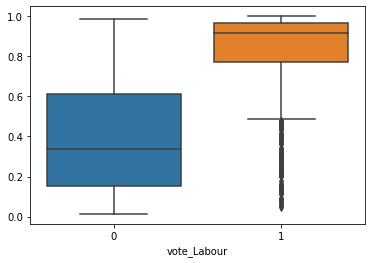

In [58]:
sns.boxplot(x=df['vote_Labour'],y=y_prob_pred)

In [59]:
y_class_pred=(y_prob_pred>=0.5).astype(np.int)
y_class_pred=(y_prob_pred>=0.5).astype(int)
y_class_pred

array([1, 1, 1, ..., 1, 0, 0])

In [60]:
from sklearn import metrics

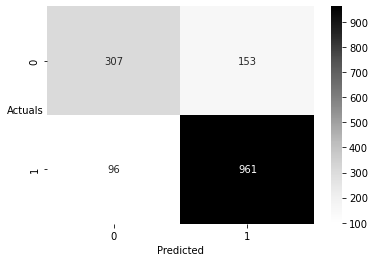

In [61]:
sns.heatmap((metrics.confusion_matrix(df['vote_Labour'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Greys');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [62]:
tn, fp, fn, tp = metrics.confusion_matrix(df['vote_Labour'],y_class_pred).ravel()

In [63]:
metrics.accuracy_score(df['vote_Labour'],y_class_pred)

0.8358602504943968

In [64]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    y_class_pred_custom_cutoff=(y_prob_pred>=custom_prob).astype(int)
    y_class_pred_custom_cutoff
   
    print(round(j,3),metrics.accuracy_score(df['vote_Labour'],y_class_pred_custom_cutoff))

0.1 0.7369808833223468
0.2 0.7771918259723137
0.3 0.8009228740936059
0.4 0.8279499011206328
0.5 0.8358602504943968
0.6 0.8279499011206328
0.7 0.8193803559657218
0.8 0.7686222808174028
0.9 0.6651285431773236


As we can see we are getting the highest accuracy score at 0.5 cutoff

In [65]:
cut_off = 0.5
y_class_pred_custom_cutoff=(y_prob_pred >= cut_off).astype(int)
y_class_pred_custom_cutoff

array([1, 1, 1, ..., 1, 0, 0])

In [66]:
def detect_outlier(x):
    # taking 5,25,75 percentile of column
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return upper_bound,lower_bound

In [67]:
df2 = df.copy()

In [68]:
cols = list(df2.select_dtypes(exclude='object').columns)

In [69]:
for i in cols:
    uvw,lvw = detect_outlier(df2[i])
    df2[i] = np.where(df2[i] > uvw, uvw, df2[i])
    df2[i] = np.where(df2[i] < lvw, lvw, df2[i])

<AxesSubplot:>

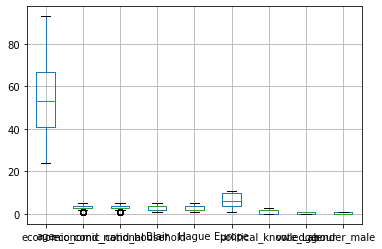

In [70]:
df.boxplot()

<AxesSubplot:>

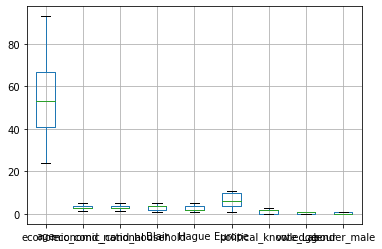

In [71]:
df2.boxplot()

In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='none',solver='newton-cg')
from sklearn import metrics

In [73]:
Train,Test = train_test_split(df,test_size=0.3,random_state=1,stratify=df['vote_Labour'])

In [74]:
LR_best = lr.fit (Train[['age', 'economic_cond_national','Blair', 'Hague', 'Europe', 'political_knowledge']], Train ['vote_Labour'])

In [75]:
LR_best_train = LR_best.predict (Train[['age', 'economic_cond_national','Blair', 'Hague', 'Europe', 'political_knowledge']])
LR_best_train_prob = LR_best.predict_proba (Train[['age', 'economic_cond_national','Blair', 'Hague', 'Europe', 'political_knowledge']])

In [76]:
LR_best_test = LR_best.predict (Test[['age', 'economic_cond_national','Blair', 'Hague', 'Europe', 'political_knowledge']])
LR_best_test_prob = LR_best.predict_proba (Test[['age', 'economic_cond_national','Blair', 'Hague', 'Europe', 'political_knowledge']])

In [77]:
print('\nAccuracy Score - Best Model')
print('Training:', metrics.accuracy_score(Train['vote_Labour'],LR_best_train))
print('Testing: ', metrics.accuracy_score(Test['vote_Labour'],LR_best_test))


Accuracy Score - Best Model
Training: 0.8284637134778511
Testing:  0.8552631578947368


## 1.5 Apply KNN Model. Interpret the results.

In [78]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()

In [79]:
KNN_model.fit(X_train,y_train)

## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8539114043355325
[[217  90]
 [ 65 689]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [80]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8245614035087719
[[108  45]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [81]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]

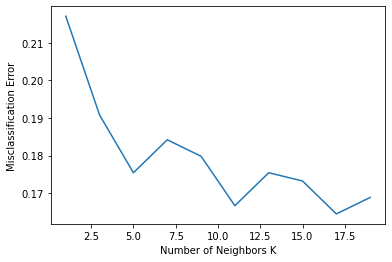

In [82]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [83]:
MCE

[0.2171052631578947,
 0.1907894736842105,
 0.17543859649122806,
 0.1842105263157895,
 0.17982456140350878,
 0.16666666666666663,
 0.17543859649122806,
 0.17324561403508776,
 0.16447368421052633,
 0.16885964912280704]

In [84]:
KNN_model2=KNeighborsClassifier(n_neighbors=12)
KNN_model2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [85]:
KNN_model.fit(X_train,y_train)
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8539114043355325
[[217  90]
 [ 65 689]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [86]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8245614035087719
[[108  45]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [87]:
y_train_predict = KNN_model2.predict(X_train)
model_score = KNN_model2.score(X_train, y_train)
print("Accuracy (K=12) on train scaled data", model_score)
y_test_predict = KNN_model2.predict(X_test)
model_score = KNN_model2.score(X_test, y_test)
print("Accuracy (K=12) on test scaled data", model_score)

Accuracy (K=12) on train scaled data 0.8482563619227145
Accuracy (K=12) on test scaled data 0.8399122807017544


In [88]:
params = {'n_neighbors':[6,8,10,12,14,16,19],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'leaf_size':list(range(1,30)),
         'p':[1,2],
          'metric':['minkowski','euclidean','manhattan','chebyshev','mahalanobis']}

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=params,refit=True,verbose=1)
grid_knn.fit(X_train,y_train)

Fitting 5 folds for each of 8120 candidates, totalling 40600 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'chebyshev', 'mahalanobis'],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 19],
                         'p': [1, 2]},
             verbose=1)

In [90]:
grid_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 16,
 'p': 1}

In [138]:
Grid_train_predict=grid_knn.predict(X_train)
Grid_test_predict=grid_knn.predict(X_test)

In [139]:
print("Train Accuracy is : {}".format(metrics.accuracy_score(y_train,Grid_train_predict)))

print("\nTest Accuracy is : {}".format(metrics.accuracy_score(y_test, Grid_test_predict)))

Train Accuracy is : 0.8416588124410933

Test Accuracy is : 0.8333333333333334


In [91]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,roc_curve
print("Train Accuracy is : {}".format(accuracy_score(y_train,grid_knn.predict(X_train))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,grid_knn.predict(X_test))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,grid_knn.predict_proba(X_train)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,grid_knn.predict_proba(X_test)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,grid_knn.predict(X_train)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,grid_knn.predict(X_test)))

Train Accuracy is : 0.8416588124410933

Test Accuracy is : 0.8333333333333334

Train ROC-AUC score is : 0.9074210076119544

Test ROC-AUC score is : 0.8888565327120949

Confusion matrix for train set :  
 [[213  94]
 [ 74 680]]

Confusion matrix for test set :  
 [[109  44]
 [ 32 271]]


In [92]:
from sklearn.metrics import classification_report
print('Classification report Train set :')
print(classification_report(y_train,grid_knn.predict(X_train)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.74      0.69      0.72       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [93]:
print('Classification report Test set :')
print(classification_report(y_test,grid_knn.predict(X_test)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



## 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [96]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print('Accuracy of base RF model on train data', model_score)
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print('Accuracy of base RF model on test data', model_score)

Accuracy of base RF model on train data 1.0
Accuracy of base RF model on test data 0.8289473684210527


### Bagging

In [97]:
params = {'criterion':['gini', 'entropy'],
         'max_depth': list(range(4,11)),
          'min_samples_split': list (range(3,11)),
         "min_samples_leaf":list (range(1,6)),
          'n_estimators':[51,71,101,151],
          'max_features': [3,4,5,6,7]}

In [98]:
grid_search = GridSearchCV(estimator = RF_model, param_grid = params, cv = 3, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [51, 71, 101, 151]})

In [99]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 71}

In [100]:
RF_model2=RandomForestClassifier(n_estimators= 71, random_state=1, criterion = 'entropy', max_depth = 5, max_features = 5, min_samples_leaf =3, min_samples_split = 8)
RF_model2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=5,
                       min_samples_leaf=3, min_samples_split=8, n_estimators=71,
                       random_state=1)

In [101]:
## Performance Matrix on train data set
y_train_predict = RF_model2.predict(X_train)
model_score =RF_model2.score(X_train, y_train)
print('Accuracy of best RF model on train data', model_score)
y_test_predict = RF_model2.predict(X_test)
model_score = RF_model2.score(X_test, y_test)
print('Accuracy of best RF model on test data', model_score)

Accuracy of best RF model on train data 0.8689915174363808
Accuracy of best RF model on test data 0.831140350877193


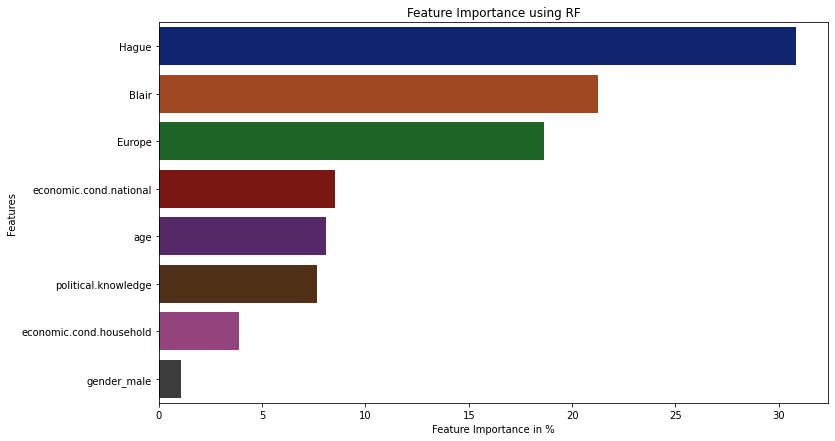

In [102]:
#Feature importance to assess which features are more important when the RF model was being built
x=pd.DataFrame(RF_model2.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

### Boosting
1. Adaptive Boosting Model

In [103]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(random_state = 1)
ADB_model.fit(X_train,y_train)
ADB_model

AdaBoostClassifier(random_state=1)

In [104]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print ('Accuracy of base ADB model on training data is', model_score)
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print ('Accuracy of base ADB model on testing data is', model_score)

Accuracy of base ADB model on training data is 0.8463713477851084
Accuracy of base ADB model on testing data is 0.8135964912280702


In [105]:
# Selection for best model
params = {'n_estimators':[11,25,51,75,101,125],
          'learning_rate': [0.01,0.05,0.07,0.1,0.2,0.3,0.4,0.5,0.7,1,1.5,2]}

In [106]:
ADB_model2 = GridSearchCV(estimator = ADB_model, param_grid = params, cv=3, n_jobs=-1)
ADB_model2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4,
                                           0.5, 0.7, 1, 1.5, 2],
                         'n_estimators': [11, 25, 51, 75, 101, 125]})

In [107]:
ADB_model2.best_params_

{'learning_rate': 0.7, 'n_estimators': 11}

In [108]:
## Performance Matrix on train & test data set
y_train_predict = ADB_model2.predict(X_train)
model_score = ADB_model2.score(X_train, y_train)
print ('Accuracy of best ADB model on training data is', model_score)
y_test_predict = ADB_model2.predict(X_test)
model_score = ADB_model2.score(X_test, y_test)
print ('Accuracy of best ADB model on testing data is', model_score)

Accuracy of best ADB model on training data is 0.8369462770970783
Accuracy of best ADB model on testing data is 0.8157894736842105


2. Gradient Boosting

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1234)
gbcl = gbcl.fit(X_train, y_train)

In [110]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print('Accuracy score on base Gradient boosting model on train data is',model_score)
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print('Accuracy score on base Gradient boosting model on test data is',model_score)

Accuracy score on base Gradient boosting model on train data is 0.8925541941564562
Accuracy score on base Gradient boosting model on test data is 0.8355263157894737


In [111]:
params = {'max_depth': list(range(4,15)),
                   'n_estimators':[21,51,71],
          'learning_rate': [0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7]}

In [112]:
gbcl2 = GridSearchCV(estimator = gbcl, param_grid = params, n_jobs=-1, cv = 5)
gbcl2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1234),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4,
                                           0.5, 0.6, 0.7],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'n_estimators': [21, 51, 71]})

In [113]:
gbcl2.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 71}

In [114]:
gbcl2 = GradientBoostingClassifier(random_state=1234, learning_rate = 0.05, max_depth = 4, n_estimators = 71)
gbcl2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, n_estimators=71,
                           random_state=1234)

In [115]:
## Performance Matrix on train data set
y_train_predict = gbcl2.predict(X_train)
model_score = gbcl2.score(X_train, y_train)
print('Accuracy score on best Gradient boosting model on train data is',model_score)
## Performance Matrix on test data set
y_test_predict = gbcl2.predict(X_test)
model_score = gbcl2.score(X_test, y_test)
print('Accuracy score on best Gradient boosting model on test data is',model_score)

Accuracy score on best Gradient boosting model on train data is 0.8916116870876531
Accuracy score on best Gradient boosting model on test data is 0.8201754385964912


## 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

Accuracy Score of Logistic Regression model

In [116]:
print('\nAccuracy Score - Best LR Model')
print('Training:', metrics.accuracy_score(Train['vote_Labour'],LR_best_train))
print('Testing: ', metrics.accuracy_score(Test['vote_Labour'],LR_best_test))


Accuracy Score - Best LR Model
Training: 0.8284637134778511
Testing:  0.8552631578947368


In [130]:
print('Best LR model - Training Data')
print(metrics.classification_report(Train['vote_Labour'],LR_best_train),'\n')

print('Best LR model - Testing Data')
print(metrics.classification_report(Test['vote_Labour'],LR_best_test),'\n')

Best LR model - Training Data
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.83      1061
 

Best LR model - Testing Data
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456
 



#### ROC & AUC

In [131]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5

Best LR model train data AUC: 0.87691


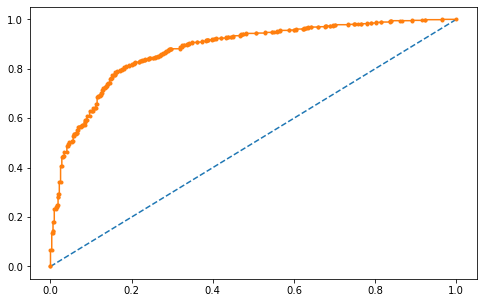

In [132]:
# calculate AUC
auc = metrics.roc_auc_score(Train['vote_Labour'],LR_best_train_prob[:, 1])#keeping only the probabilities for the desired class outcome
print('Best LR model train data AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Train['vote_Labour'],LR_best_train_prob[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Best LR model test data AUC: 0.91230


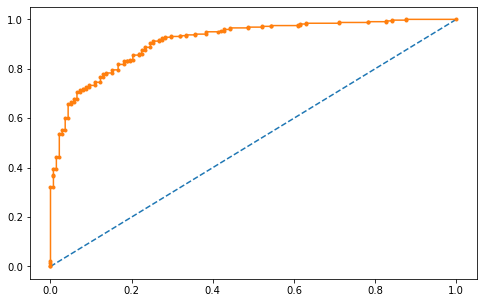

In [134]:
# calculate AUC
auc = metrics.roc_auc_score(Test['vote_Labour'],LR_best_test_prob[:, 1])#keeping only the probabilities for the desired class outcome
print('Best LR model test data AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['vote_Labour'],LR_best_test_prob[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### KNN Model 

In [141]:
print('Accuracy Score - Base KNN model (K=5)')
print('Training:', KNN_model.score(X_train, y_train))
print('Testing: ', KNN_model.score(X_test, y_test))

print('\nAccuracy Score - Optimal K - KNN model (K=12)')
print('Training:', KNN_model2.score(X_train, y_train))
print('Testing: ', KNN_model2.score(X_test, y_test))

print('\nAccuracy Score - KNN model after hyperparameter tuning')
print("Training:", metrics.accuracy_score(y_train,Grid_train_predict))
print("Testing:" , metrics.accuracy_score(y_test, Grid_test_predict))

Accuracy Score - Base KNN model (K=5)
Training: 0.8539114043355325
Testing:  0.8245614035087719

Accuracy Score - Optimal K - KNN model (K=12)
Training: 0.8482563619227145
Testing:  0.8399122807017544

Accuracy Score - KNN model after hyperparameter tuning
Training: 0.8416588124410933
Testing: 0.8333333333333334


Text(0.5, 1.0, 'Testing Data - Tuned KNN model')

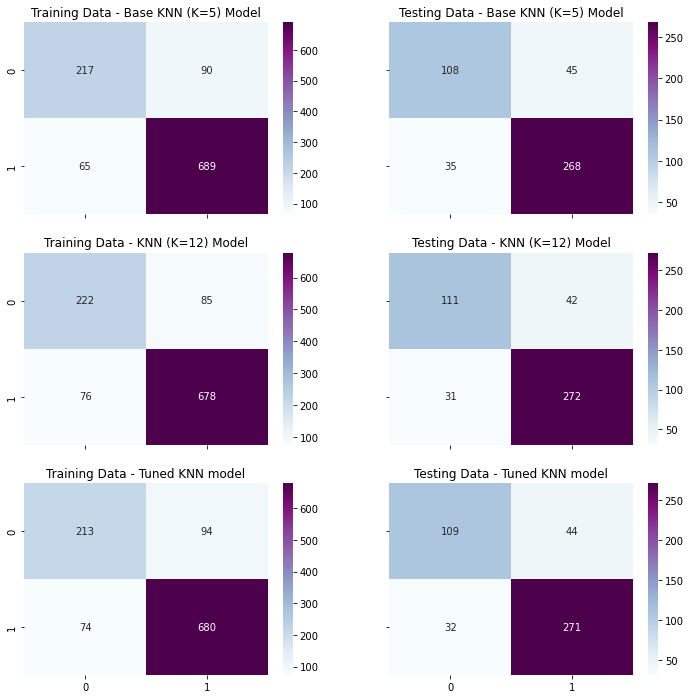

In [142]:
f,a =  plt.subplots(3,2,sharex=True,sharey=True, figsize = (12,12))

#Plotting confusion matrix for the different models for the Training Data

plot_00 = sns.heatmap((metrics.confusion_matrix(y_train,KNN_model.predict(X_train))),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][0]);
a[0][0].set_title('Training Data - Base KNN (K=5) Model')
plot_10 = sns.heatmap((metrics.confusion_matrix(y_train,KNN_model2.predict(X_train))),annot=True,fmt='.5g',cmap='BuPu',ax=a[1][0]);
a[1][0].set_title('Training Data - KNN (K=12) Model')
plot_20 = sns.heatmap((metrics.confusion_matrix(y_train,Grid_train_predict)),annot=True,fmt='.5g',cmap='BuPu',ax=a[2][0]);
a[2][0].set_title('Training Data - Tuned KNN model')


#Plotting confusion matrix for the different models for the Test Data

plot_01 = sns.heatmap((metrics.confusion_matrix(y_test,KNN_model.predict(X_test))),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][1]);
a[0][1].set_title('Testing Data - Base KNN (K=5) Model')
plot_11 = sns.heatmap((metrics.confusion_matrix(y_test,KNN_model2.predict(X_test))),annot=True,fmt='.5g',cmap='BuPu',ax=a[1][1]);
a[1][1].set_title('Testing Data - KNN (K=12) Model')
plot_21 = sns.heatmap((metrics.confusion_matrix(y_test,Grid_test_predict)),annot=True,fmt='.5g',cmap='BuPu',ax=a[2][1]);
a[2][1].set_title('Testing Data - Tuned KNN model')

In [143]:
print('Base KNN model (K=5) - Training Data')
print(metrics.classification_report(y_train,KNN_model.predict(X_train)),'\n')

print('Base KNN model (K=5) - Testing Data')
print(metrics.classification_report(y_test,KNN_model.predict(X_test)),'\n')

print('Optimal K KNN model (K=12) - Training Data')
print(metrics.classification_report(y_train,KNN_model2.predict(X_train)),'\n')

print('Optimal K KNN model (K=12) - Testing Data')
print(metrics.classification_report(y_test,KNN_model2.predict(X_test)),'\n')

print('Tuned KNN model - Training Data')
print(metrics.classification_report(y_train,Grid_train_predict),'\n')

print('Tuned KNN model - Testing Data')
print(metrics.classification_report(y_test,Grid_test_predict),'\n')

Base KNN model (K=5) - Training Data
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061
 

Base KNN model (K=5) - Testing Data
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 

Optimal K KNN model (K=12) - Training Data
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       307
           1       0.89      0.90      0.89       754

    accuracy                           0.85      1061
   macro

ROC & AUC

In [144]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5

Base KNN model train data AUC: 0.92788


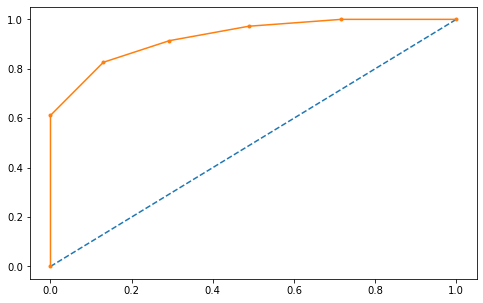

KNN (K=12) model train data AUC: 0.90949


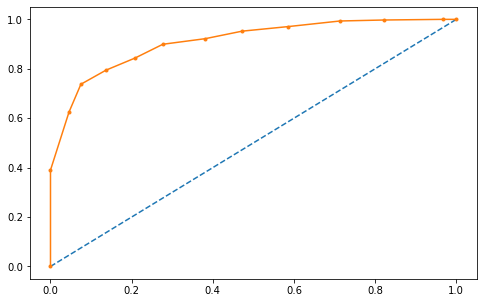

Tuned KNN model train data AUC: 0.90742


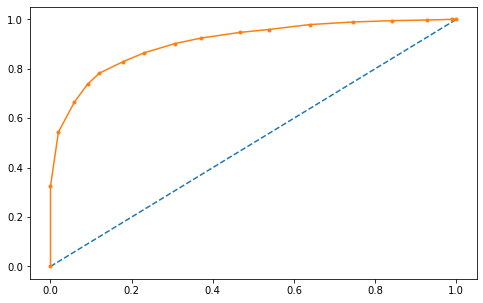

In [145]:
# calculate AUC
auc = metrics.roc_auc_score(y_train,KNN_model.predict_proba(X_train)[:, 1])#keeping only the probabilities for the desired class outcome
print('Base KNN model train data AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,KNN_model.predict_proba(X_train)[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# calculate AUC
auc = metrics.roc_auc_score(y_train,KNN_model2.predict_proba(X_train)[:, 1])#keeping only the probabilities for the desired class outcome
print('KNN (K=12) model train data AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,KNN_model2.predict_proba(X_train)[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# calculate AUC
auc = metrics.roc_auc_score(y_train,grid_knn.predict_proba(X_train)[:, 1])#keeping only the probabilities for the desired class outcome
print('Tuned KNN model train data AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,grid_knn.predict_proba(X_train)[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Base KNN model test data AUC: 0.86729


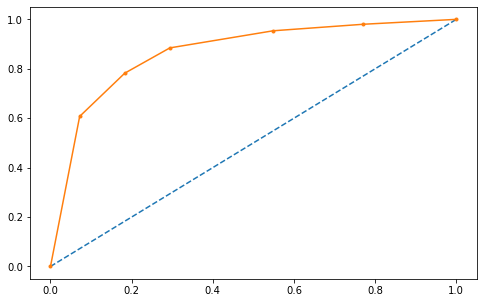

KNN (K=12) model test data AUC: 0.88762


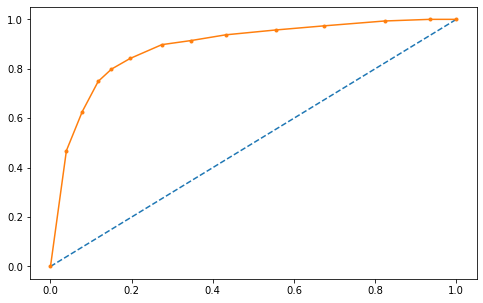

Tuned KNN model test data AUC: 0.88886


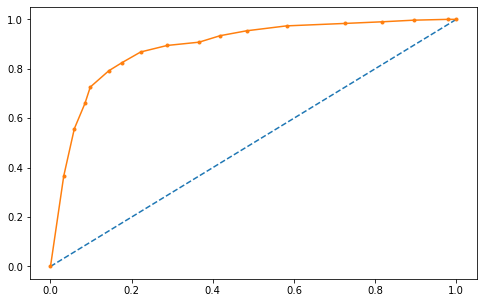

In [146]:
# calculate AUC
auc = metrics.roc_auc_score(y_test,KNN_model.predict_proba(X_test)[:, 1])#keeping only the probabilities for the desired class outcome
print('Base KNN model test data AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,KNN_model.predict_proba(X_test)[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# calculate AUC
auc = metrics.roc_auc_score(y_test,KNN_model2.predict_proba(X_test)[:, 1])#keeping only the probabilities for the desired class outcome
print('KNN (K=12) model test data AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,KNN_model2.predict_proba(X_test)[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# calculate AUC
auc = metrics.roc_auc_score(y_test,grid_knn.predict_proba(X_test)[:, 1])#keeping only the probabilities for the desired class outcome
print('Tuned KNN model test data AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,grid_knn.predict_proba(X_test)[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Bagging - Random Forest

In [147]:
print('Accuracy Score - Base RF model')
print('Training:', RF_model.score(X_train, y_train))
print('Testing: ', RF_model.score(X_test, y_test))

print('\nAccuracy Score - Tuned RF model')
print('Training:', RF_model2.score(X_train, y_train))
print('Testing: ', RF_model2.score(X_test, y_test))

Accuracy Score - Base RF model
Training: 1.0
Testing:  0.8289473684210527

Accuracy Score - Tuned RF model
Training: 0.8689915174363808
Testing:  0.831140350877193


Text(0.5, 1.0, 'Testing Data - Tuned RF Model')

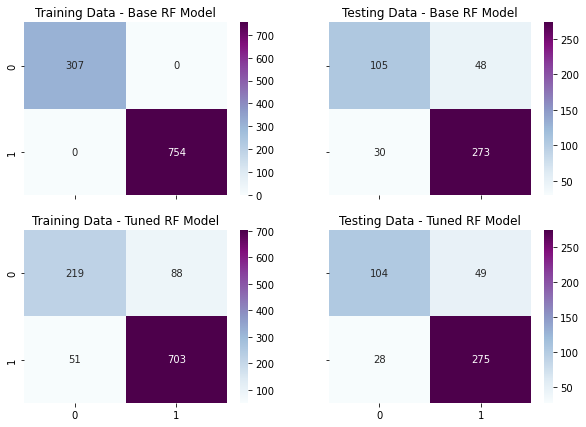

In [148]:
f,a =  plt.subplots(2,2,sharex=True,sharey=True, figsize = (10,7))

#Plotting confusion matrix for the different models for the Training Data

plot_00 = sns.heatmap((metrics.confusion_matrix(y_train,RF_model.predict(X_train))),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][0]);
a[0][0].set_title('Training Data - Base RF Model')
plot_10 = sns.heatmap((metrics.confusion_matrix(y_train,RF_model2.predict(X_train))),annot=True,fmt='.5g',cmap='BuPu',ax=a[1][0]);
a[1][0].set_title('Training Data - Tuned RF Model')


#Plotting confusion matrix for the different models for the Test Data

plot_01 = sns.heatmap((metrics.confusion_matrix(y_test,RF_model.predict(X_test))),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][1]);
a[0][1].set_title('Testing Data - Base RF Model')
plot_11 = sns.heatmap((metrics.confusion_matrix(y_test,RF_model2.predict(X_test))),annot=True,fmt='.5g',cmap='BuPu',ax=a[1][1]);
a[1][1].set_title('Testing Data - Tuned RF Model')


In [149]:
print('Base RF model - Training Data')
print(metrics.classification_report(y_train,RF_model.predict(X_train)),'\n')

print('Base RF model - Testing Data')
print(metrics.classification_report(y_test,RF_model.predict(X_test)),'\n')

print('Tuned RF model - Training Data')
print(metrics.classification_report(y_train,RF_model2.predict(X_train)),'\n')

print('Tuned RF model - Testing Data')
print(metrics.classification_report(y_test,RF_model2.predict(X_test)),'\n')

Base RF model - Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061
 

Base RF model - Testing Data
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456
 

Tuned RF model - Training Data
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       307
           1       0.89      0.93      0.91       754

    accuracy                           0.87      1061
   macro avg       0.85      0.82 

Base RF model train data AUC: 1.00000


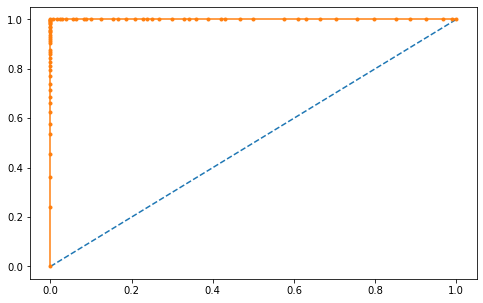

Tuned RF model train data AUC: 0.93159


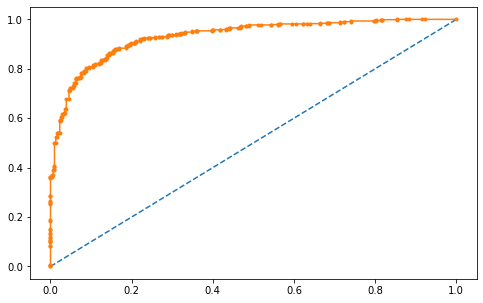

In [150]:
# calculate AUC
auc = metrics.roc_auc_score(y_train,RF_model.predict_proba(X_train)[:, 1])#keeping only the probabilities for the desired class outcome
print('Base RF model train data AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,RF_model.predict_proba(X_train)[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# calculate AUC
auc = metrics.roc_auc_score(y_train,RF_model2.predict_proba(X_train)[:, 1])#keeping only the probabilities for the desired class outcome
print('Tuned RF model train data AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,RF_model2.predict_proba(X_train)[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Base RF model test data AUC: 0.89486


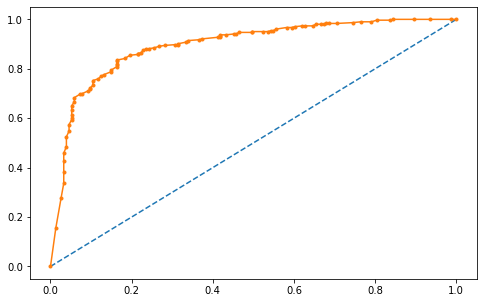

Tuned RF model test data AUC: 0.89617


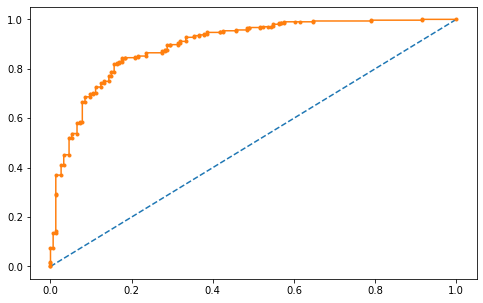

In [151]:
# calculate AUC
auc = metrics.roc_auc_score(y_test,RF_model.predict_proba(X_test)[:, 1])#keeping only the probabilities for the desired class outcome
print('Base RF model test data AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,RF_model.predict_proba(X_test)[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# calculate AUC
auc = metrics.roc_auc_score(y_test,RF_model2.predict_proba(X_test)[:, 1])#keeping only the probabilities for the desired class outcome
print('Tuned RF model test data AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,RF_model2.predict_proba(X_test)[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

##### Boosting - Adaptive Boosting

In [152]:
print('Accuracy Score - Base ADB model')
print('Training:', ADB_model.score(X_train, y_train))
print('Testing: ', ADB_model.score(X_test, y_test))

print('\nAccuracy Score - Tuned ADB model')
print('Training:', ADB_model2.score(X_train, y_train))
print('Testing: ', ADB_model2.score(X_test, y_test))

Accuracy Score - Base ADB model
Training: 0.8463713477851084
Testing:  0.8135964912280702

Accuracy Score - Tuned ADB model
Training: 0.8369462770970783
Testing:  0.8157894736842105


Text(0.5, 1.0, 'Testing Data - Tuned ADB Model')

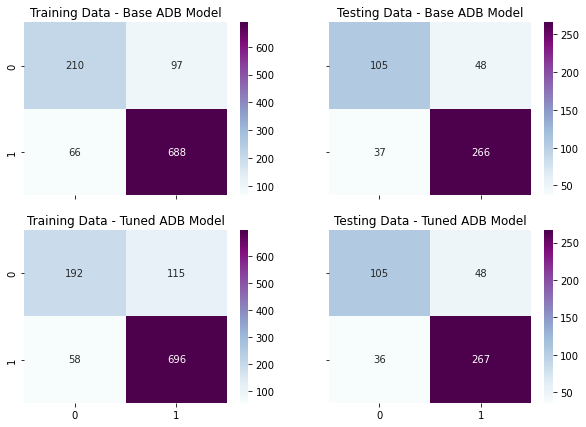

In [153]:
f,a =  plt.subplots(2,2,sharex=True,sharey=True, figsize = (10,7))

#Plotting confusion matrix for the different models for the Training Data

plot_00 = sns.heatmap((metrics.confusion_matrix(y_train,ADB_model.predict(X_train))),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][0]);
a[0][0].set_title('Training Data - Base ADB Model')
plot_10 = sns.heatmap((metrics.confusion_matrix(y_train,ADB_model2.predict(X_train))),annot=True,fmt='.5g',cmap='BuPu',ax=a[1][0]);
a[1][0].set_title('Training Data - Tuned ADB Model')


#Plotting confusion matrix for the different models for the Test Data

plot_01 = sns.heatmap((metrics.confusion_matrix(y_test,ADB_model.predict(X_test))),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][1]);
a[0][1].set_title('Testing Data - Base ADB Model')
plot_11 = sns.heatmap((metrics.confusion_matrix(y_test,ADB_model2.predict(X_test))),annot=True,fmt='.5g',cmap='BuPu',ax=a[1][1]);
a[1][1].set_title('Testing Data - Tuned ADB Model')

In [154]:
print('Base ADB model - Training Data')
print(metrics.classification_report(y_train,ADB_model.predict(X_train)),'\n')

print('Base ADB model - Testing Data')
print(metrics.classification_report(y_test,ADB_model.predict(X_test)),'\n')

print('Tuned ADB model - Training Data')
print(metrics.classification_report(y_train,ADB_model2.predict(X_train)),'\n')

print('Tuned ADB model - Testing Data')
print(metrics.classification_report(y_test,ADB_model2.predict(X_test)),'\n')

Base ADB model - Training Data
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       307
           1       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061
 

Base ADB model - Testing Data
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       153
           1       0.85      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456
 

Tuned ADB model - Training Data
              precision    recall  f1-score   support

           0       0.77      0.63      0.69       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.

Base ADB model train data AUC: 0.91190


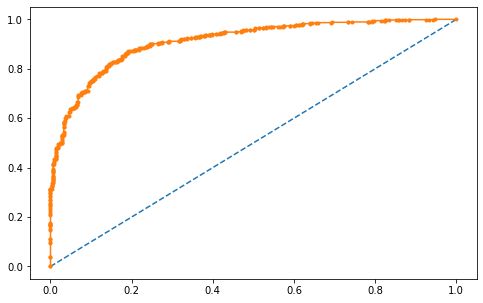

Tuned ADB model train data AUC: 0.89833


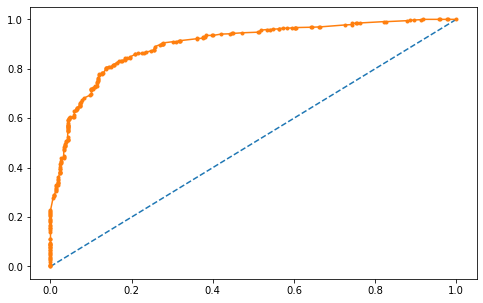

In [155]:
# calculate AUC
auc = metrics.roc_auc_score(y_train,ADB_model.predict_proba(X_train)[:, 1])#keeping only the probabilities for the desired class outcome
print('Base ADB model train data AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,ADB_model.predict_proba(X_train)[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# calculate AUC
auc = metrics.roc_auc_score(y_train,ADB_model2.predict_proba(X_train)[:, 1])#keeping only the probabilities for the desired class outcome
print('Tuned ADB model train data AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,ADB_model2.predict_proba(X_train)[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Base ADB model test data AUC: 0.88055


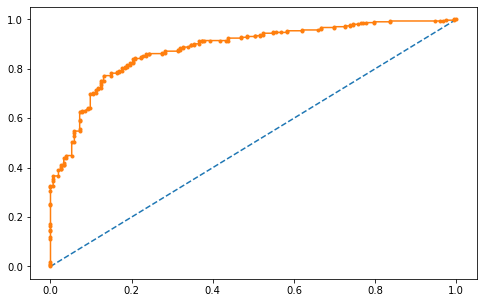

Tuned ADB model test data AUC: 0.88716


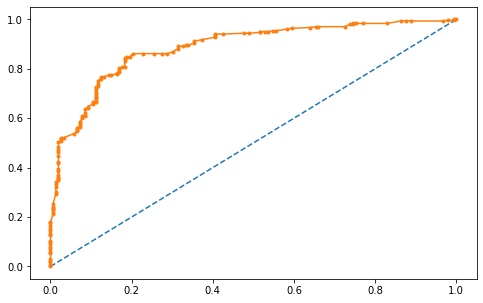

In [156]:
# calculate AUC
auc = metrics.roc_auc_score(y_test,ADB_model.predict_proba(X_test)[:, 1])#keeping only the probabilities for the desired class outcome
print('Base ADB model test data AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,ADB_model.predict_proba(X_test)[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# calculate AUC
auc = metrics.roc_auc_score(y_test,ADB_model2.predict_proba(X_test)[:, 1])#keeping only the probabilities for the desired class outcome
print('Tuned ADB model test data AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,ADB_model2.predict_proba(X_test)[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Gradient Boosting

In [157]:
print('Accuracy Score - Base Grad Boost model')
print('Training:', gbcl.score(X_train, y_train))
print('Testing: ', gbcl.score(X_test, y_test))

print('\nAccuracy Score - Tuned Grad Boost model')
print('Training:', gbcl2.score(X_train, y_train))
print('Testing: ', gbcl2.score(X_test, y_test))

Accuracy Score - Base Grad Boost model
Training: 0.8925541941564562
Testing:  0.8355263157894737

Accuracy Score - Tuned Grad Boost model
Training: 0.8916116870876531
Testing:  0.8201754385964912


Text(0.5, 1.0, 'Testing Data - Tuned Grad Boost Model')

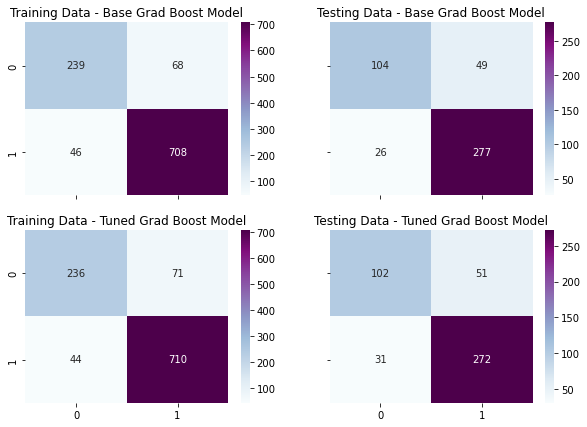

In [158]:
f,a =  plt.subplots(2,2,sharex=True,sharey=True, figsize = (10,7))

#Plotting confusion matrix for the different models for the Training Data

plot_00 = sns.heatmap((metrics.confusion_matrix(y_train,gbcl.predict(X_train))),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][0]);
a[0][0].set_title('Training Data - Base Grad Boost Model')
plot_10 = sns.heatmap((metrics.confusion_matrix(y_train,gbcl2.predict(X_train))),annot=True,fmt='.5g',cmap='BuPu',ax=a[1][0]);
a[1][0].set_title('Training Data - Tuned Grad Boost Model')


#Plotting confusion matrix for the different models for the Test Data

plot_01 = sns.heatmap((metrics.confusion_matrix(y_test,gbcl.predict(X_test))),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][1]);
a[0][1].set_title('Testing Data - Base Grad Boost Model')
plot_11 = sns.heatmap((metrics.confusion_matrix(y_test,gbcl2.predict(X_test))),annot=True,fmt='.5g',cmap='BuPu',ax=a[1][1]);
a[1][1].set_title('Testing Data - Tuned Grad Boost Model')


In [159]:
print('Base Grad Boost model - Training Data')
print(metrics.classification_report(y_train,gbcl.predict(X_train)),'\n')

print('Base Grad Boost model - Testing Data')
print(metrics.classification_report(y_test,gbcl.predict(X_test)),'\n')

print('Tuned Grad Boost model - Training Data')
print(metrics.classification_report(y_train,gbcl2.predict(X_train)),'\n')

print('Tuned Grad Boost model - Testing Data')
print(metrics.classification_report(y_test,gbcl2.predict(X_test)),'\n')

Base Grad Boost model - Training Data
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061
 

Base Grad Boost model - Testing Data
              precision    recall  f1-score   support

           0       0.80      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456
 

Tuned Grad Boost model - Training Data
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro a

Base Grad Boost model train data AUC: 0.95116


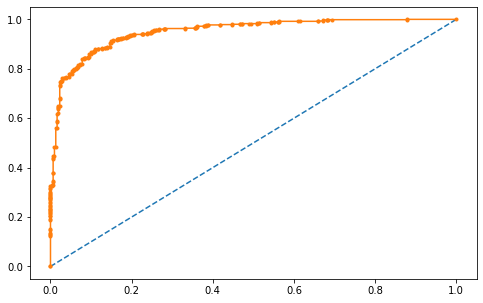

Tuned Grad Boost model train data AUC: 0.94880


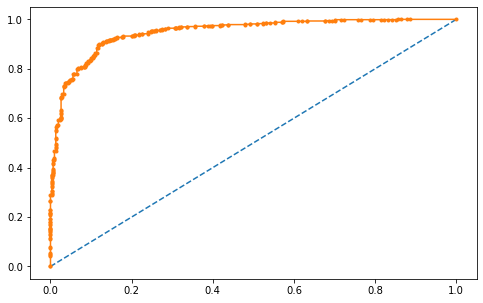

In [160]:
# calculate AUC
auc = metrics.roc_auc_score(y_train,gbcl.predict_proba(X_train)[:, 1])#keeping only the probabilities for the desired class outcome
print('Base Grad Boost model train data AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,gbcl.predict_proba(X_train)[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# calculate AUC
auc = metrics.roc_auc_score(y_train,gbcl2.predict_proba(X_train)[:, 1])#keeping only the probabilities for the desired class outcome
print('Tuned Grad Boost model train data AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,gbcl2.predict_proba(X_train)[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Base Grad Boost model test data AUC: 0.89856


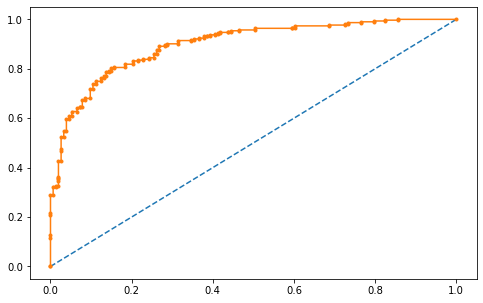

Tuned Grad Boost model test data AUC: 0.89579


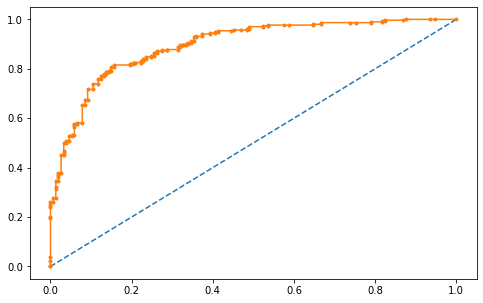

In [161]:
# calculate AUC
auc = metrics.roc_auc_score(y_test,gbcl.predict_proba(X_test)[:, 1])#keeping only the probabilities for the desired class outcome
print('Base Grad Boost model test data AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, gbcl.predict_proba(X_test)[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# calculate AUC
auc = metrics.roc_auc_score(y_test, gbcl2.predict_proba(X_test)[:, 1])#keeping only the probabilities for the desired class outcome
print('Tuned Grad Boost model test data AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, gbcl2.predict_proba(X_test)[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

For comparision of all the models please check out business report

## 1.8 Based on these predictions, what are the insights?

Please refer to business report

### End of Codes ### 